In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the dataset (assuming 'spam.csv' is in the same directory)
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]

In [3]:
# Convert labels to binary (0 for 'ham', 1 for 'spam')
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})


In [4]:
# Split into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

In [5]:
# Tokenize texts
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train_texts)

In [6]:

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [7]:
# Pad sequences to a fixed length
max_length = 100  # Maximum length of sequences
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_length)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_length)

In [8]:
# Build the model
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/10
140/140 - 2s - 13ms/step - accuracy: 0.8616 - loss: 0.3894 - val_accuracy: 0.8655 - val_loss: 0.3693
Epoch 2/10
140/140 - 0s - 3ms/step - accuracy: 0.8661 - loss: 0.3595 - val_accuracy: 0.8655 - val_loss: 0.3603
Epoch 3/10
140/140 - 0s - 3ms/step - accuracy: 0.8661 - loss: 0.3459 - val_accuracy: 0.8655 - val_loss: 0.3395
Epoch 4/10
140/140 - 0s - 3ms/step - accuracy: 0.8661 - loss: 0.3103 - val_accuracy: 0.8655 - val_loss: 0.2898
Epoch 5/10
140/140 - 0s - 3ms/step - accuracy: 0.8831 - loss: 0.2361 - val_accuracy: 0.9004 - val_loss: 0.2072
Epoch 6/10
140/140 - 0s - 3ms/step - accuracy: 0.9513 - loss: 0.1435 - val_accuracy: 0.9623 - val_loss: 0.1306
Epoch 7/10
140/140 - 0s - 2ms/step - accuracy: 0.9746 - loss: 0.0858 - val_accuracy: 0.9767 - val_loss: 0.1304
Epoch 8/10
140/140 - 0s - 2ms/step - accuracy: 0.9821 - loss: 0.0633 - val_accuracy: 0.9749 - val_loss: 0.0843
Epoch 9/10
140/140 - 0s - 2ms/step - accuracy: 0.9856 - loss: 0.0515 - val_accuracy: 0.9677 - val_loss: 0.1117


In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy}')

35/35 - 0s - 2ms/step - accuracy: 0.9794 - loss: 0.0747
Test Accuracy: 0.9793722033500671


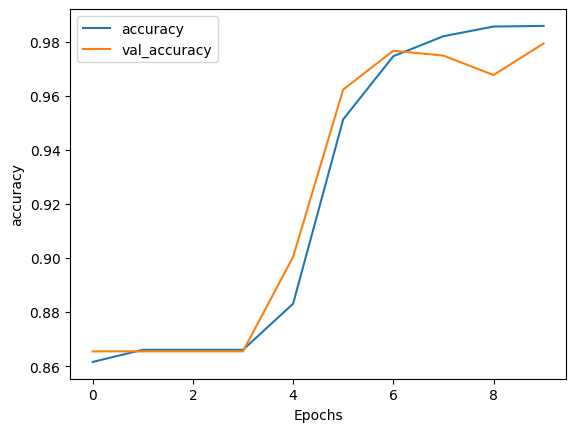

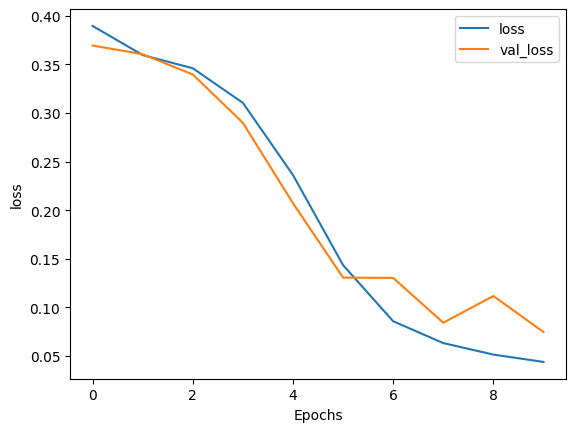

In [11]:
# Visualize results
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")